In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_recall_fscore_support, f1_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pickle

In [41]:
dataset = pd.read_csv("diabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [42]:
dataset["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [43]:
dataset.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [44]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [45]:
dataset.shape

(768, 9)

In [46]:
##EDA

statistical analysis: mean median mode, box plots, statistical testing (A/B testing)
histograms for each independent variable
a) Glucose and Outcome
b) BMI and Outcome
c) Age and outcome
d) blood pressure and Outcome



In [47]:
columns= dataset.columns
columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [48]:
def age_bands(age):
    if age<= 20:
        return "< 20"
    if age >20 and age<=30:
        return "21-30"
    if age >30 and age <=40:
        return "31-40"
    if age >40 and age <=50:
        return "41-50"
    if age >50 and age <=60:
        return "51-60"
    if age >60 :
        return "Over 60"

## Applying age bands function on Age column. This column will be used for EDA
dataset["Age_Band"] = dataset["Age"].apply(age_bands)

In [49]:
## Separating dataset based on diabetes and non diabetes
# used for EDA
diabetes_dataset = dataset[dataset["Outcome"] == 1]
non_diabetes_dataset = dataset[dataset["Outcome"] == 0]

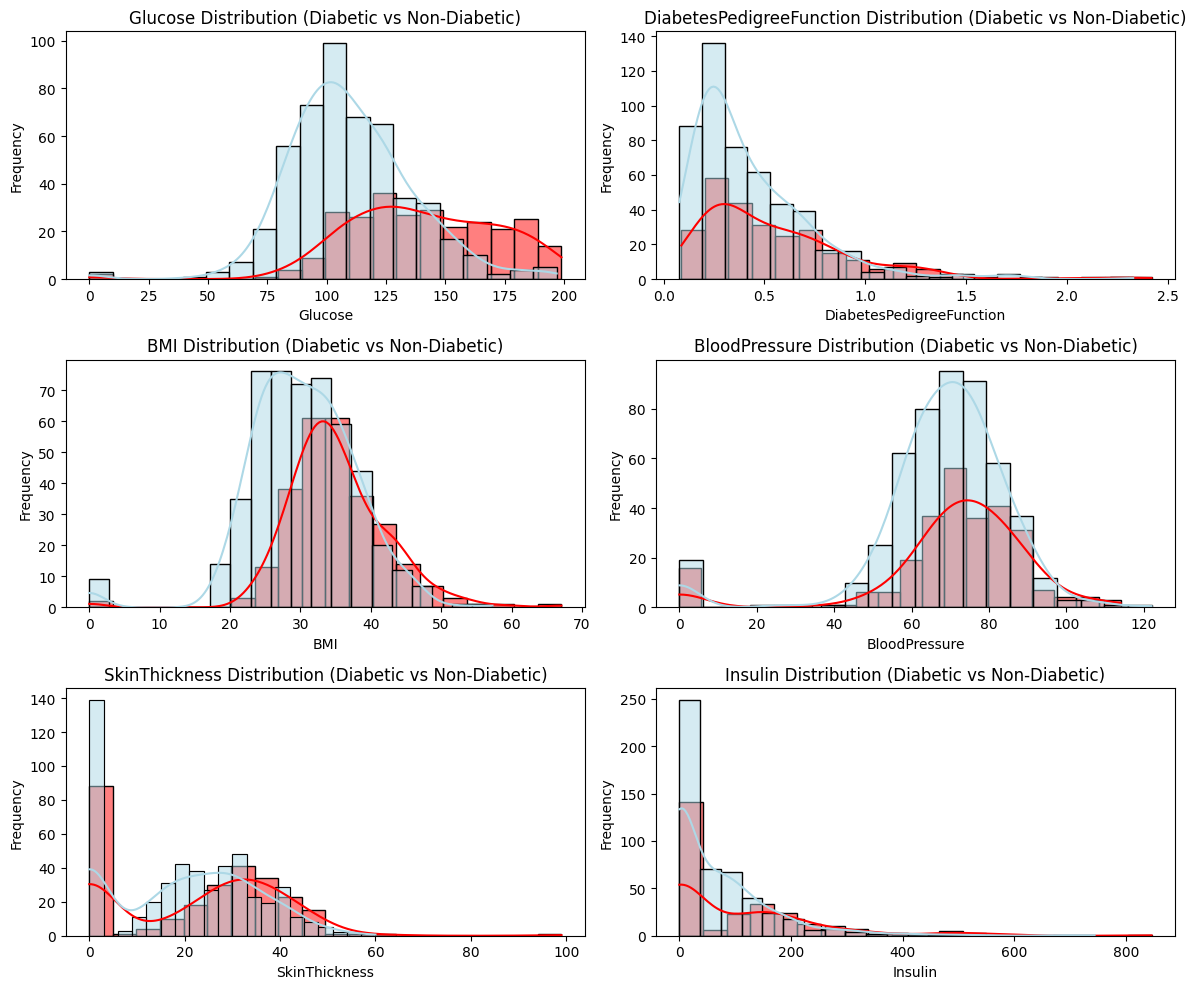

In [50]:
## Write a function for this
features = ['Glucose', 'DiabetesPedigreeFunction', 'BMI', 'BloodPressure', 'SkinThickness', 'Insulin']

def plot_histograms_comparison(diabetic_df, non_diabetic_df, features, n_rows=3, n_cols=2, bins=20):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10))
    axes = axes.flatten()  # Flatten the 2D array to loop easily
    for i, feature in enumerate(features):
        if i >= len(axes):
            break  # Safety check to avoid index error if more features than subplots

        sns.histplot(data=diabetic_df, x=feature, kde=True, bins=bins, color="red", ax=axes[i])
        sns.histplot(data=non_diabetic_df, x=feature, kde=True, bins=bins, color="lightblue", ax=axes[i])
        axes[i].set_title(f'{feature} Distribution (Diabetic vs Non-Diabetic)')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel("Frequency")
    plt.savefig("images/eda_histograms.png", dpi=300)
    plt.tight_layout()
    plt.show()

plot_histograms_comparison(diabetes_dataset, non_diabetes_dataset, features)

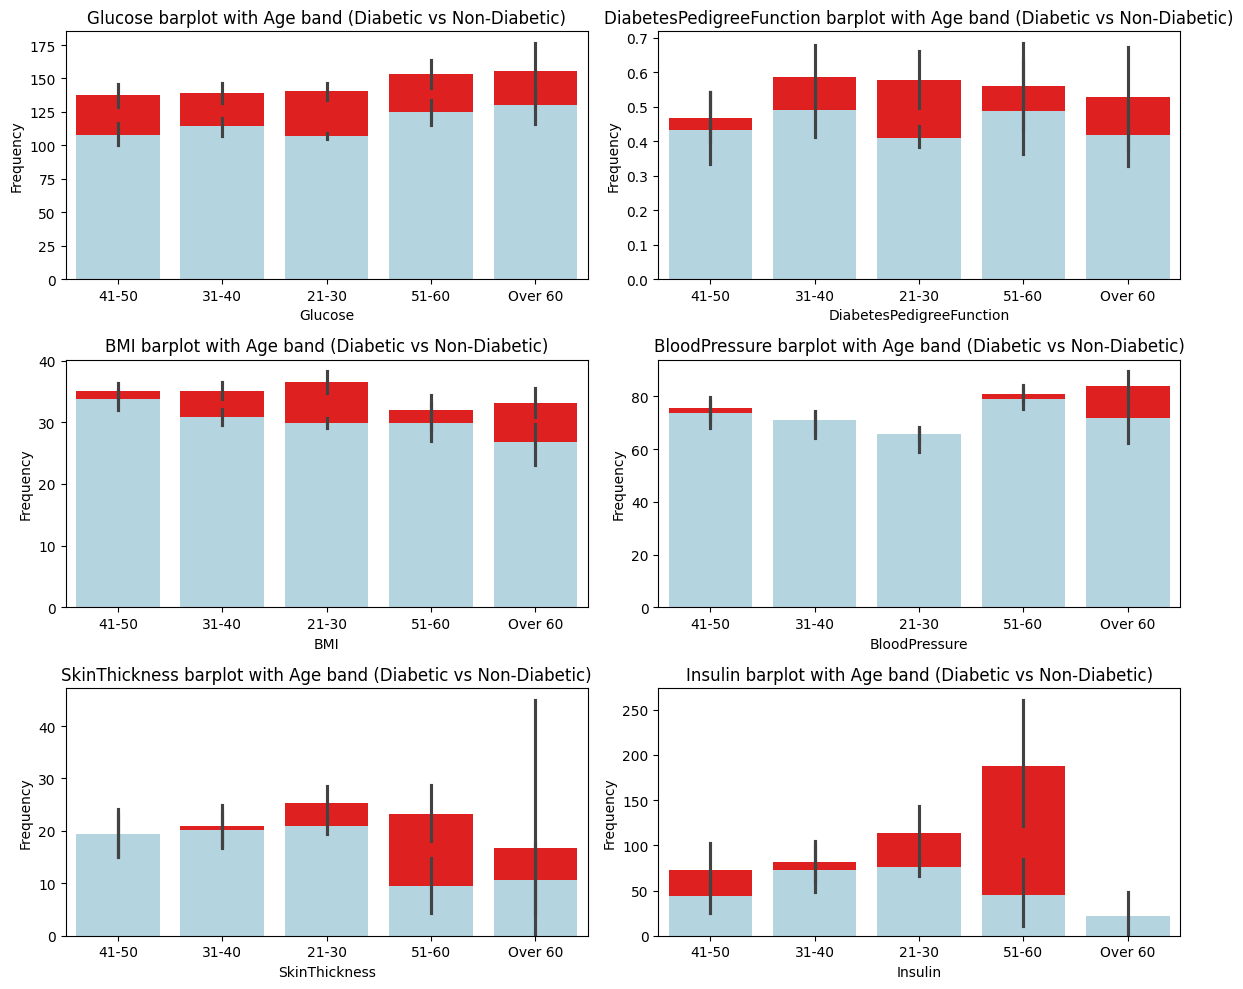

In [51]:
features = ['Glucose', 'DiabetesPedigreeFunction', 'BMI', 'BloodPressure', 'SkinThickness', 'Insulin']

def bar_plot(diabetic_df, non_diabetic_df, features, n_rows=3, n_cols =2):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10))
    axes =  axes.flatten()
    for i, feature in enumerate(features):
        sns.barplot(data=diabetic_df, x='Age_Band', y=feature, color ="red", ax =axes[i])
        sns.barplot(data=non_diabetic_df, x='Age_Band', y=feature , color ="lightblue", ax =axes[i])

    #sns.bar(data=non_diabetes_dataset, x='Glucose', kde=True, bins=20, color="lightblue")
        axes[i].set_title(f'{feature} barplot with Age band (Diabetic vs Non-Diabetic)')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel("Frequency")

    plt.savefig("images/eda_barplots.png", dpi=300)

    plt.tight_layout()
    plt.show()

bar_plot(diabetes_dataset,non_diabetes_dataset,features)

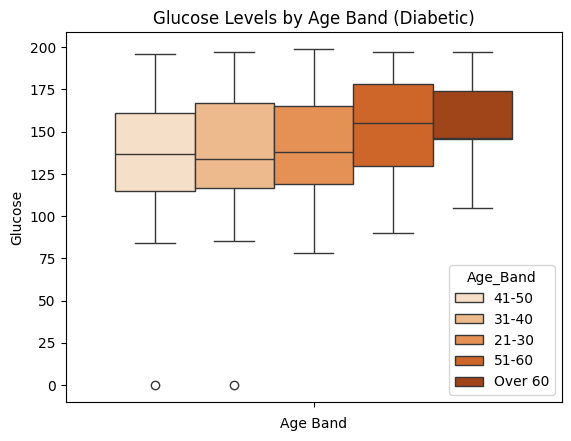

In [52]:

sns.boxplot(data=diabetes_dataset, hue='Age_Band', y='Glucose', palette='Oranges')
plt.title('Glucose Levels by Age Band (Diabetic)')
plt.ylabel('Glucose')
plt.xlabel('Age Band')
plt.savefig("images/eda_boxplot.png", dpi=300)

plt.show()




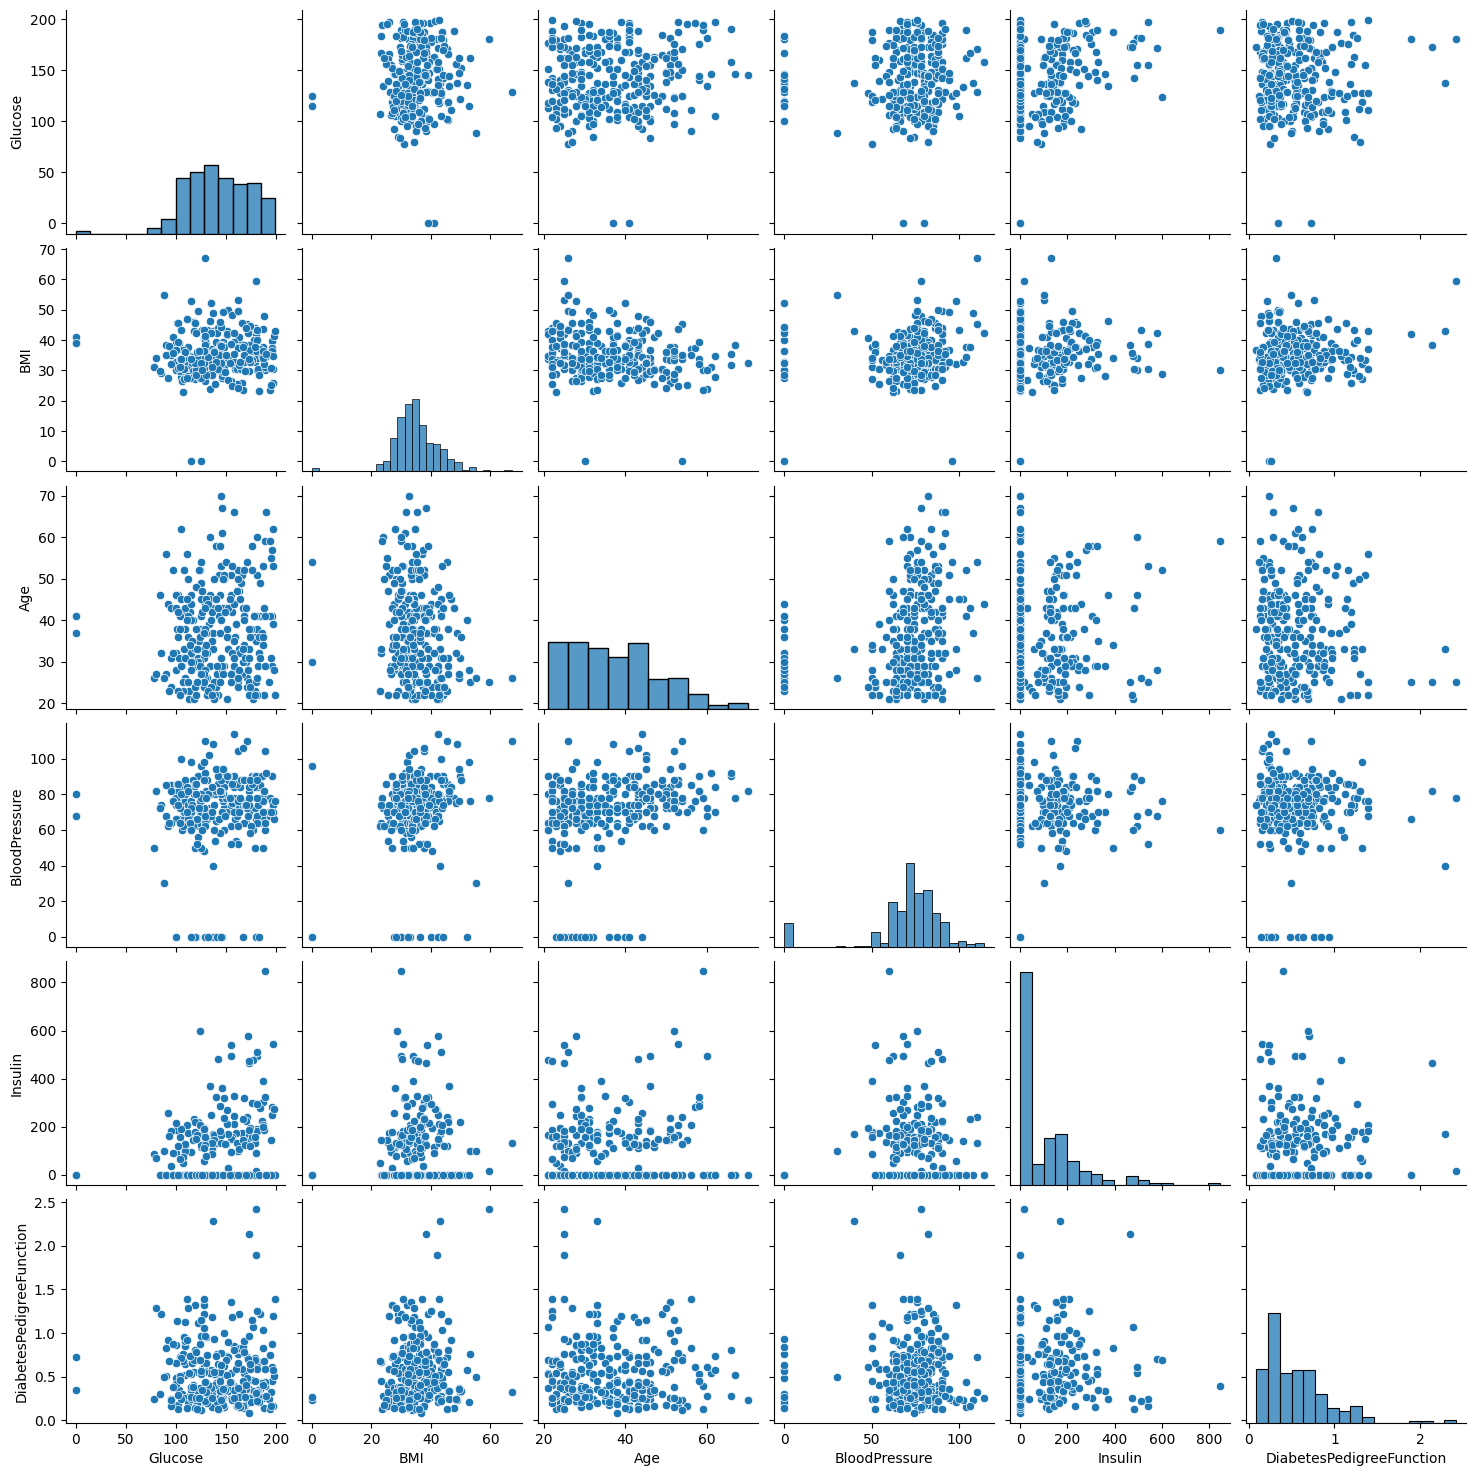

In [53]:
sns.pairplot(diabetes_dataset[['Glucose', 'BMI', 'Age', 'BloodPressure', 'Insulin','DiabetesPedigreeFunction']])
plt.savefig("images/eda_pairplot.png", dpi=300)


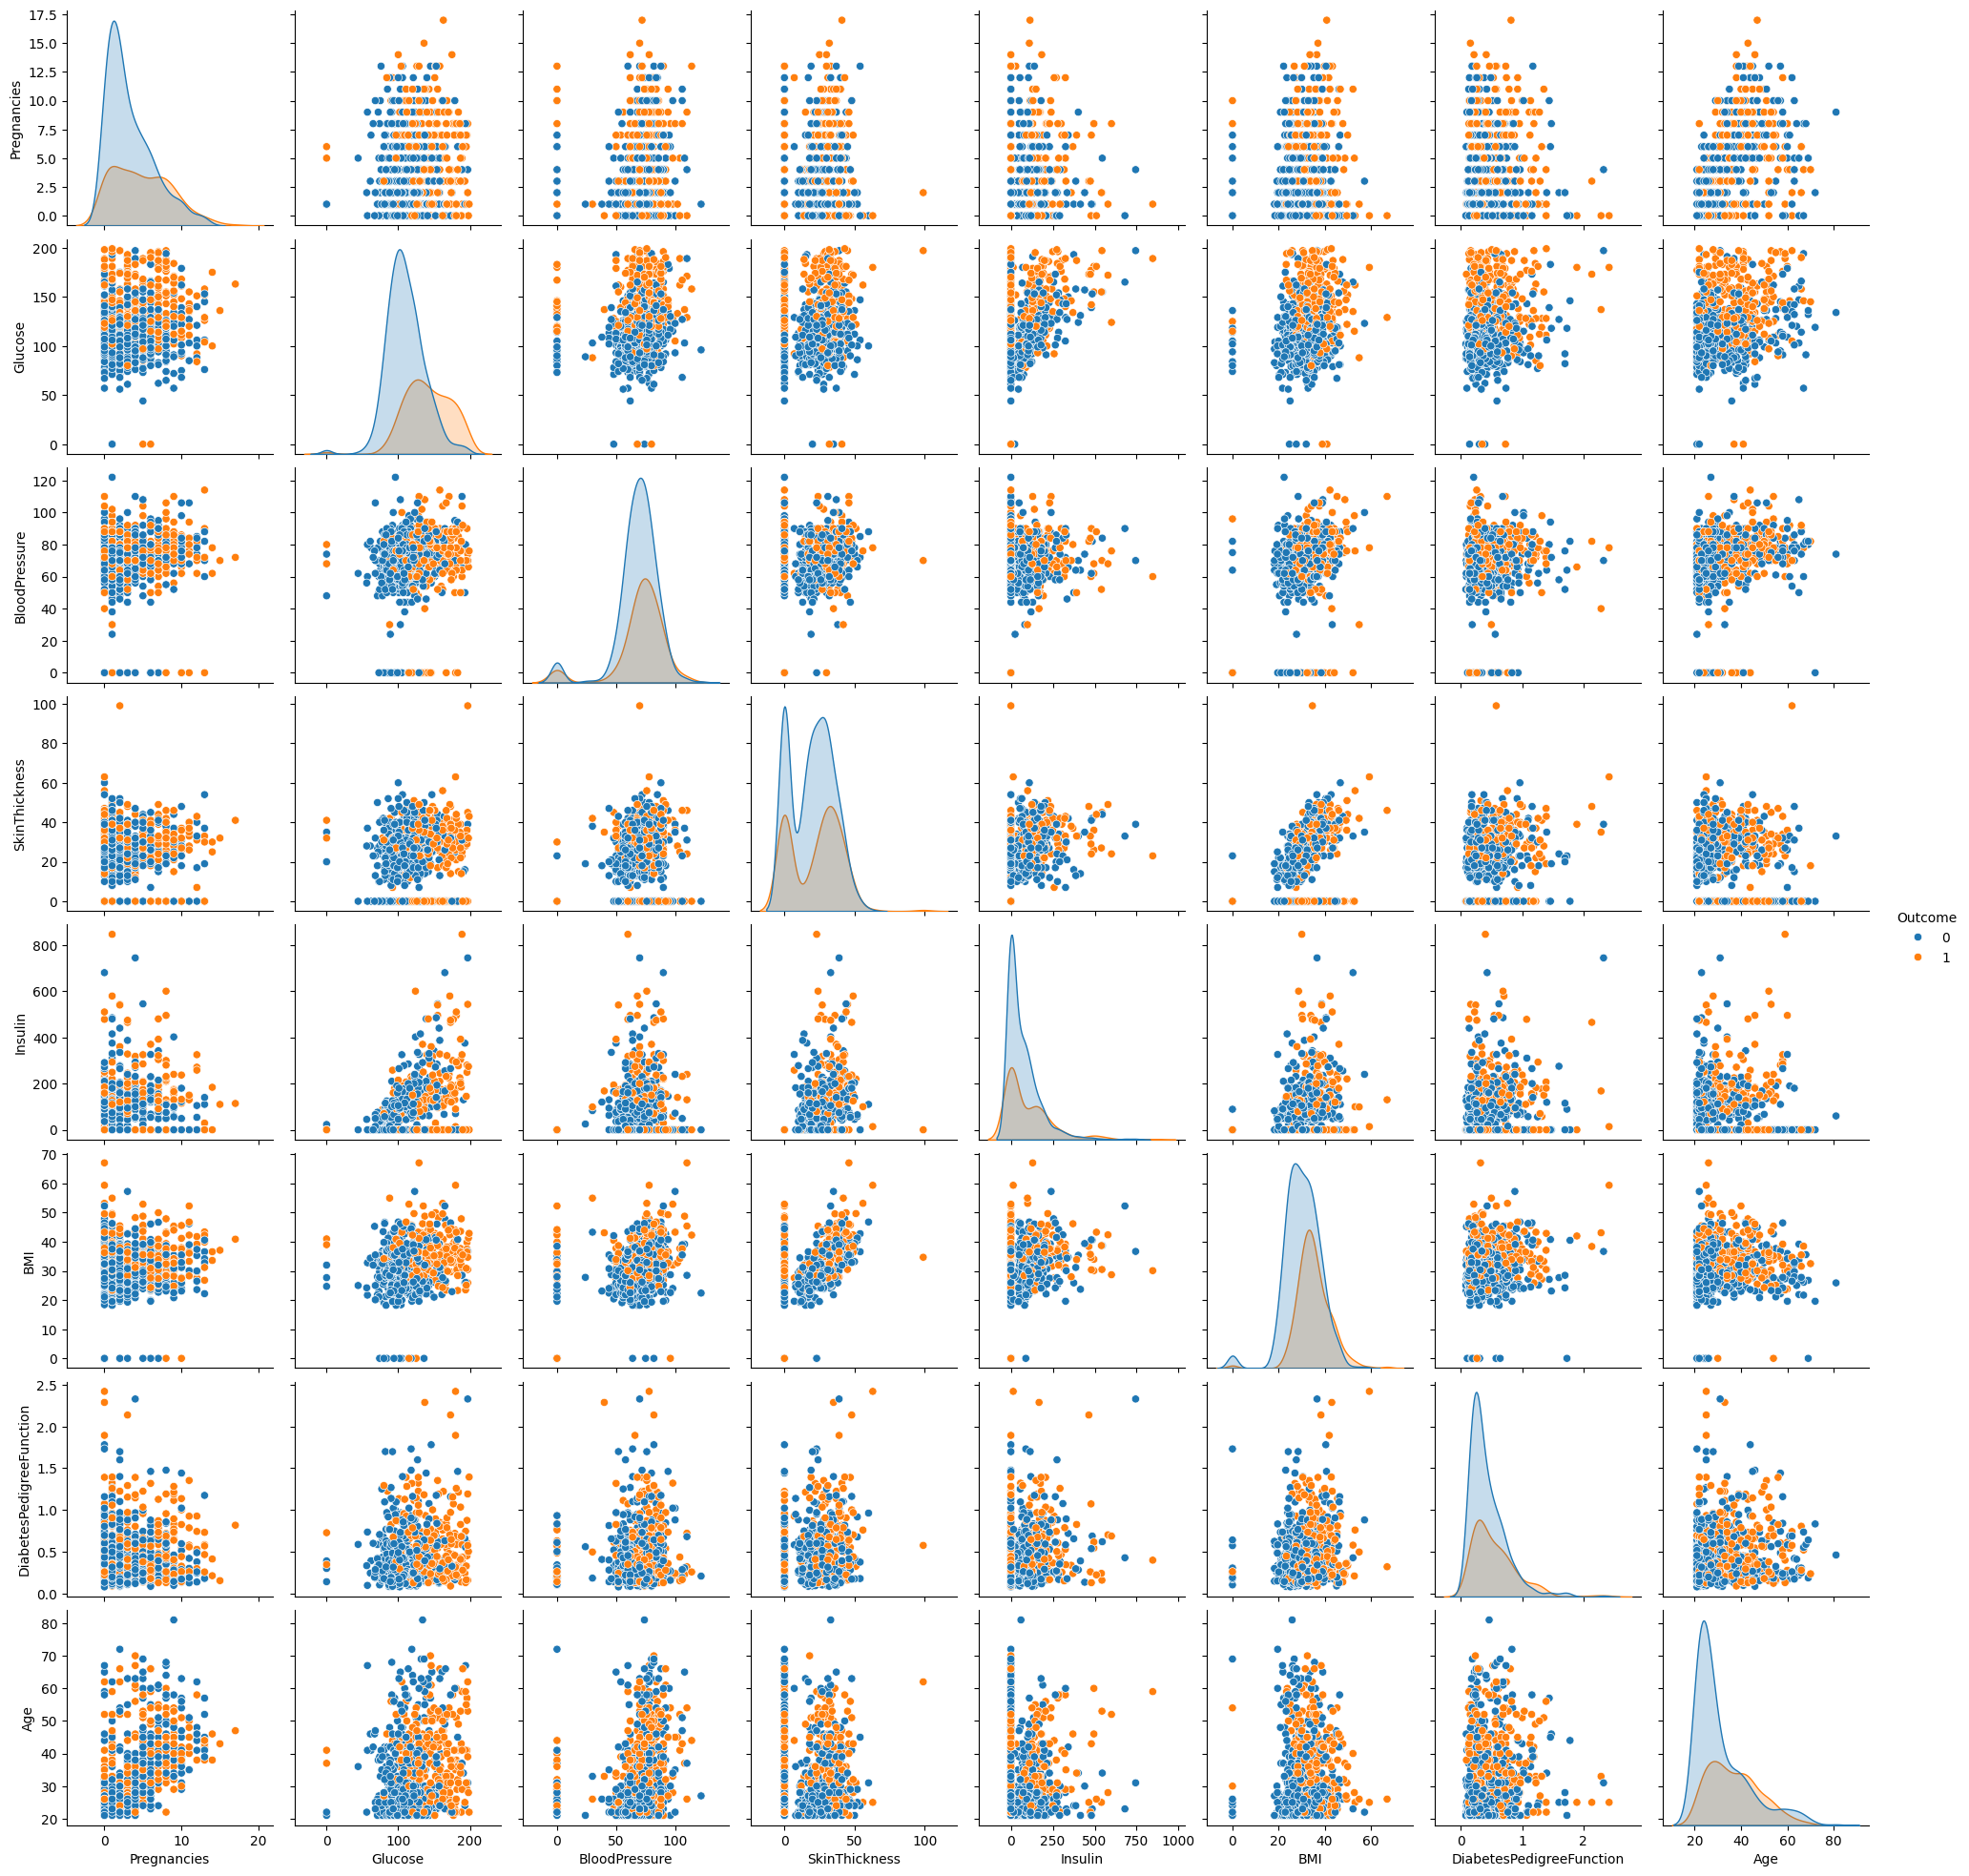

In [55]:
sns.pairplot(dataset, hue= 'Outcome')


<Axes: xlabel='Insulin', ylabel='Age'>

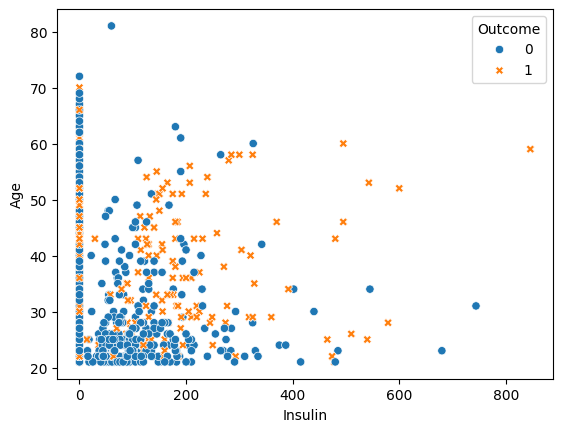

In [65]:
sns.scatterplot(data = dataset, x = 'Insulin', y = 'Age',hue = 'Outcome', style = 'Outcome')

In [22]:
non_diabetes_columns= non_diabetes_dataset.drop(["Outcome", "Age_Band","Pregnancies"],axis=1).columns

mean_non_diabetic = non_diabetes_dataset[non_diabetes_columns].mean()
mean_diabetic = diabetes_dataset[non_diabetes_columns].mean()

mean_df = pd.DataFrame({
    "Feature": non_diabetes_columns,
    "Diabetic": mean_diabetic.values,
    "Non-Diabetic": mean_non_diabetic.values
})

In [23]:
# Unpivotting those values
## Reformatting those values to use it in bar graph
mean_df_melted = mean_df.melt(id_vars="Feature", var_name="Group", value_name="Mean Value")
mean_df_melted

,Feature,Group,Mean Value
0,Glucose,Diabetic,141.257463
1,BloodPressure,Diabetic,70.824627
2,SkinThickness,Diabetic,22.164179
3,Insulin,Diabetic,100.335821
4,BMI,Diabetic,35.142537
5,DiabetesPedigreeFunction,Diabetic,0.550500
6,Age,Diabetic,37.067164
7,Glucose,Non-Diabetic,109.980000
8,BloodPressure,Non-Diabetic,68.184000
9,SkinThickness,Non-Diabetic,19.664000


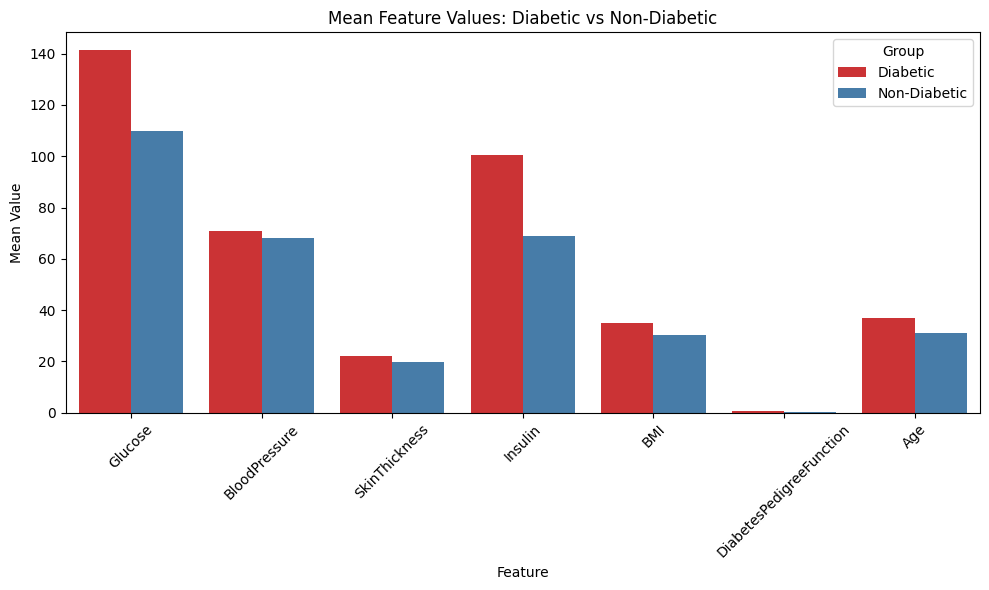

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_df_melted, x="Feature", y="Mean Value", hue="Group", palette="Set1")
plt.title("Mean Feature Values: Diabetic vs Non-Diabetic")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.savefig("images/eda_mean.png", dpi=300)
plt.tight_layout()
plt.show()


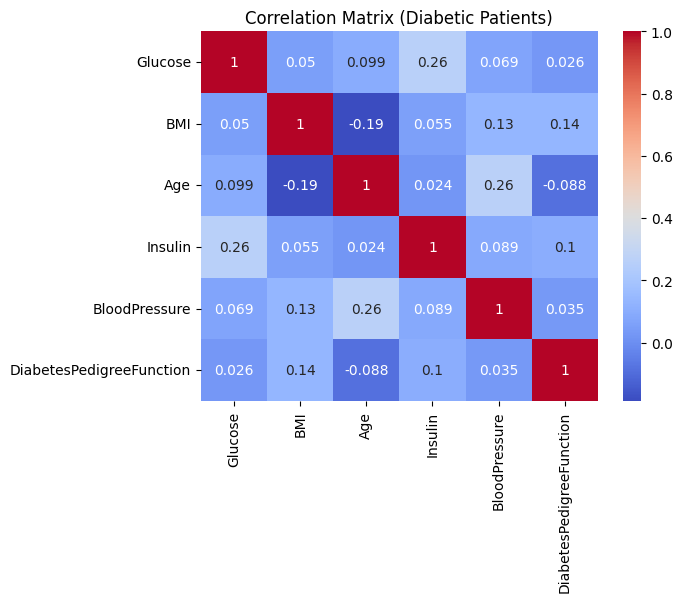

In [25]:
sns.heatmap(diabetes_dataset[['Glucose', 'BMI', 'Age','Insulin','BloodPressure','DiabetesPedigreeFunction']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Diabetic Patients)')
plt.savefig("images/eda_heatmap.png", dpi=300)

plt.show()


In [26]:
grouped_stats = diabetes_dataset.groupby('Age_Band')[['Glucose', 'BMI']].mean().round(2)
grouped_stats= grouped_stats.reset_index()
grouped_stats

,Age_Band,Glucose,BMI
0,21-30,140.32,36.46
1,31-40,139.00,35.07
2,41-50,137.81,35.10
3,51-60,153.45,32.05
4,Over 60,155.29,33.13


In [27]:
#mean_df_melted = mean_df.melt(id_vars="Feature", var_name="Group", value_name="Mean Value")

melted_groups_stats = grouped_stats.melt(
    id_vars= "Age_Band",
    var_name= "Feature",
    value_name = "Mean")

In [28]:
melted_groups_stats

,Age_Band,Feature,Mean
0,21-30,Glucose,140.32
1,31-40,Glucose,139.00
2,41-50,Glucose,137.81
3,51-60,Glucose,153.45
4,Over 60,Glucose,155.29
5,21-30,BMI,36.46
6,31-40,BMI,35.07
7,41-50,BMI,35.10
8,51-60,BMI,32.05
9,Over 60,BMI,33.13


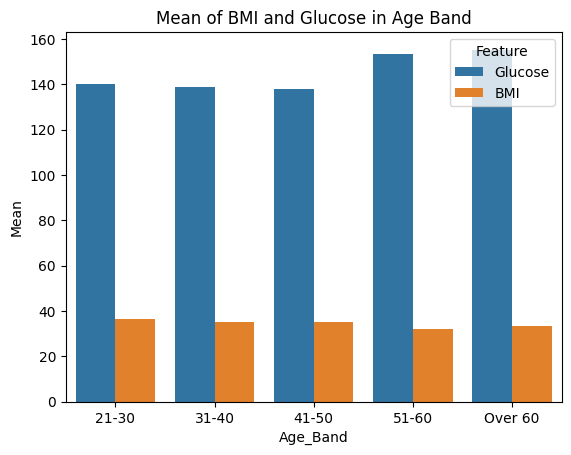

In [29]:
sns.barplot(data = melted_groups_stats, x = 'Age_Band', y = 'Mean', hue = 'Feature')
plt.title("Mean of BMI and Glucose in Age Band")
plt.savefig("images/eda_mean_ageband.png", dpi=300)


In [30]:
groupby_diabetic_mean = dataset.groupby('Outcome')[['Glucose', 'BMI', 'Insulin', 'BloodPressure','DiabetesPedigreeFunction','Age']].mean().round(2)
groupby_diabetic_mean= groupby_diabetic_mean.reset_index()
groupby_diabetic_mean

,Outcome,Glucose,BMI,Insulin,BloodPressure,DiabetesPedigreeFunction,Age
0,0,109.98,30.30,68.79,68.18,0.43,31.19
1,1,141.26,35.14,100.34,70.82,0.55,37.07


In [31]:
melted_diabetic_group = groupby_diabetic_mean.melt(
    id_vars= "Outcome",
    var_name= "Feature",
    value_name = "Mean")

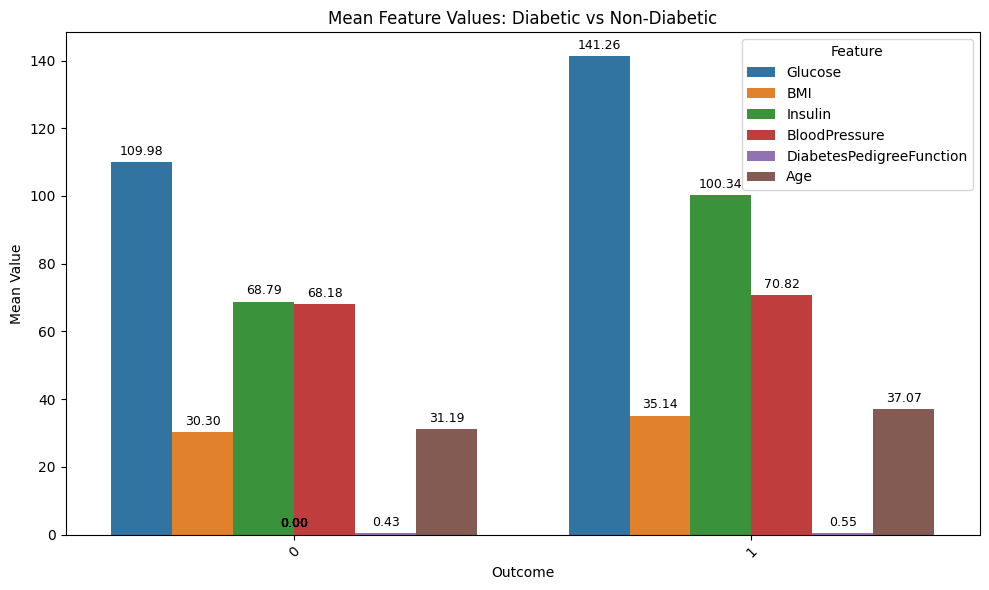

In [32]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data= melted_diabetic_group, x = 'Outcome', y ='Mean', hue = 'Feature')
plt.title("Mean Feature Values: Diabetic vs Non-Diabetic")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',               # format to 1 decimal
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=9, color='black', xytext=(0, 3), textcoords='offset points')

plt.savefig("images/eda_mean_features.png", dpi=300)

plt.show()



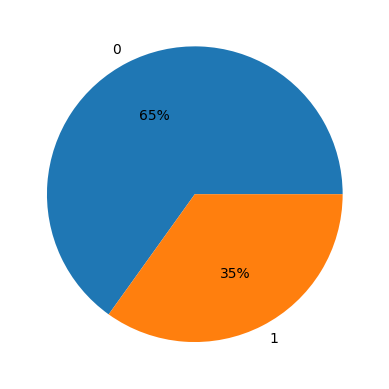

In [34]:
#dataset['Outcome'].value_counts()
outcome_counts = dataset['Outcome'].value_counts()

plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%.0f%%')
plt.savefig("images/imbalanced_data.png", dpi=300)
